<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300%ED%9A%8C%EA%B7%80_C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴스에서만 보던 코로나-19 데이터, 직접 분석하고 직접 판단해봅시다.
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 John Hopkins 대학의 COVID-19 데이터셋을 사용합니다.
    
    - 총 10개의 파일 중 2개의 Raw 데이터를 사용합니다.
    RAW_global_confirmed_cases.csv
    RAW_global_global_deaths.csv

    - 각 파일의 컬럼은 아래와 같습니다.
    Country/Region: 국가
    Province/State: 지방/주
    Lat: 지역의 위도
    Long: 지역의 경도
    날짜: 각 날짜의 확진자/사망자 수
    
    
    
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ ['KAGGLE_USERNAME'] = 'pseudoexaminee'
os.environ ['KAGGLE_KEY'] = '50ef5cd85c486772c23beb302ab99e32'

In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

 74% 5.00M/6.80M [00:00<00:00, 31.0MB/s]
100% 6.80M/6.80M [00:00<00:00, 33.2MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


In [ ]:
df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')

In [6]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168


In [7]:
df_case.isna().sum()

Country/Region      0
Province/State    193
Lat                 2
Long                2
1/22/20             0
                 ... 
11/26/21            0
11/27/21            0
11/28/21            0
11/29/21            0
11/30/21            0
Length: 683, dtype: int64

In [8]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7252,7253,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297,7297,7299,7301,7303,7303,7305,7306,7307,7307,7308,7308,7308,7308
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2863,2870,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035,3035,3049,3053,3063,3068,3077,3085,3089,3092,3096
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5883,5886,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017,6021,6026,6030,6035,6041,6046,6052,6058,6064,6071
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,131,131,131,131
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1693,1695,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730,1730,1730,1730,1731,1732,1733,1733,1733,1733,1733


In [11]:
df_case.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004


In [12]:
df_case = df_case.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()

In [15]:
df_case = df_case.T

In [16]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/26/21,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,18837,...,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,865,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
11/27/21,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
11/28/21,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,18837,...,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,865,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48229210,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951
11/29/21,157260,199750,210344,16712,65155,4141,5328416,338120,210238,1151809,586640,22763,277628,1576011,25152,653323,1749469,30338,24850,2640,536472,274219,195068,22084749,15058,692376,15711,521931,20415,38367,120112,106794,1798515,11708,5107,1761365,111218,5067348,4498,18905,...,6402,263486,1159767,418413,20,23016,2963679,12755,5153923,563267,42826,865,50823,119

In [17]:
df_case.index.name = 'Date'

In [18]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/26/21,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,18837,...,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,865,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
11/27/21,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
11/28/21,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,18837,...,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,865,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48229210,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951


In [19]:
df_case.reset_index(inplace=True)

In [20]:
df_case

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,11/26/21,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,...,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,865,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
675,11/27/21,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
676,11/28/21,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,...,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,865,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48229210,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951
677,11/29/21,157260,199750,210344,16712,65155,4141,5328416,338120,210238,1151809,586640,22763,277628,1576011,25152,653323,1749469,30338,24850,2640,536472,274219,195068,22084749,15058,692376,15711,521931,20415,38367,120112,106794,1798515,11708,5107,1761365,111218,5067348,4498,...,6402,263486,1159767,418413,20,23016,2963679,12755,5153923,563267,42826,865,50823,1198848,1006239,48068,1659

In [22]:
df_case['Date'] = df_case['Date'].apply(lambda s: pd.to_datetime(str(s)))

In [23]:
df_case

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,2021-11-26,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,...,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,865,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
675,2021-11-27,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
676,2021-11-28,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,...,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,865,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48229210,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951
677,2021-11-29,157260,199750,210344,16712,65155,4141,5328416,338120,210238,1151809,586640,22763,277628,1576011,25152,653323,1749469,30338,24850,2640,536472,274219,195068,22084749,15058,692376,15711,521931,20415,38367,120112,106794,1798515,11708,5107,1761365,111218,5067348,4498,...,6402,263486,1159767,418413,20,23016,2963679,12755,5153923,563267,42826,865,50823,119

In [24]:
df_case.set_index('Date', inplace=True)

In [25]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,18837,...,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,865,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
2021-11-27,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,865,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
2021-11-28,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,18837,...,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,865,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48229210,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951


In [26]:
df_death

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
0,Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7252,7253,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297,7297,7299,7301,7303,7303,7305,7306,7307,7307,7308,7308,7308,7308
1,Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2863,2870,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035,3035,3049,3053,3063,3068,3077,3085,3089,3092,3096
2,Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5883,5886,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017,6021,6026,6030,6035,6041,6046,6052,6058,6064,6071
3,Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,131,131,131,131
4,Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1693,1695,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730,1730,1730,1730,1731,1732,1733,1733,1733,1733,1733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,NaN,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21543,21620,21673,21738,21802,21856,21910,21966,22030,22083,22131,22205,22283,22342,22412,22470,22531,22598,22686,22765,22849,22930,23018,23082,23183,23270,23337,23476,23578,23685,23761,23951,24118,24243,24407,24544,24692,24882,25055,25252
276,West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4611,4611,4611,4636,4644,4651,4657,4663,4663,4663,4681,4689,4694,4697,4705,4705,4705,4724,4731,4733,4737,4743,4743,4743,4754,4761,4764,4767,4770,4770,4770,4779,4781,4783,4788,4789,4789,4789,4796,4796
277,Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1835,1838,1840,1850,1858,1868,1874,1877,1880,1889,1890,1894,1897,1901,1905,1907,1909,1909,1915,1918,1920,1921,1923,1923,1926,1926,1929,1934,1935,1938,1938,1939,1942,1942,1943,1943,1945,1946,1949,1950
278,Zambia,NaN,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3658,3659,3659,3659,3660,3660,3660,3660,3661,3661,3661,3661,3661,3662,3662,3663,3664,3664,3664,3664,3664,3664,3664,3666,3666,3666,3666,3666,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667,3667


In [28]:
df_death = df_death.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()

In [29]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7252,7253,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297,7297,7299,7301,7303,7303,7305,7306,7307,7307,7308,7308,7308,7308
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2863,2870,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014,3022,3029,3035,3035,3049,3053,3063,3068,3077,3085,3089,3092,3096
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5883,5886,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005,6009,6015,6017,6021,6026,6030,6035,6041,6046,6052,6058,6064,6071
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,131,131,131,131,131,131,131
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1693,1695,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729,1729,1729,1730,1730,1730,1730,1731,1732,1733,1733,1733,1733,1733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21543,21620,21673,21738,21802,21856,21910,21966,22030,22083,22131,22205,22283,22342,22412,22470,22531,22598,22686,22765,22849,22930,23018,23082,23183,23270,23337,23476,23578,23685,23761,23951,24118,24243,24407,24544,24692,24882,25055,25252
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4611,4611,4611,4636,4644,4651,4657,4663,4663,4663,4681,4689,4694,4697,4705,4705,4705,4724,4731,4733,4737,4743,4743,4743,4754,4761,4764,4767,4770,4770,4770,4779,4781,4783,4788,4789,4789,4789,4796,4796
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1835,1838,1840,1850,1858,1868,1874,1877,1880,1889,1890,1894,1897,1901,1905,1907,1909,1909,1915,1918,1920,1921,1923,1923,1926,1926,1929,1934,1935,1938,1938,1939,1942,1942,1943,1943,1945,1946,1949,1950


In [30]:
df_death = df_death.T

In [31]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/26/21,7307,3077,6046,131,1733,117,116505,7459,1990,12284,7767,671,1394,27973,223,5026,26840,570,161,3,19137,12456,2416,613957,97,27996,265,19067,38,349,2922,1791,29671,101,175,38245,4849,128343,150,349,...,121,684,14177,5142,0,1327,89783,133,87955,14258,3114,0,1162,15145,11470,2729,848,125,730,20677,122,243,0,2061,25362,76041,776349,3251,89307,2145,145036,6124,1392,1,5124,24544,4789,1943,3667,4704
11/27/21,7308,3085,6052,131,1733,117,116517,7485,1994,12349,7789,671,1394,27975,223,5041,26840,570,161,3,19137,12456,2416,614186,97,28043,281,19079,38,349,2927,1791,29681,101,175,38282,4849,128394,150,349,...,121,690,14228,5165,0,1327,89791,133,87955,14278,3114,0,1164,15145,11470,2729,848,125,730,20677,122,243,0,2090,25363,76233,776536,3252,89911,2145,145167,6125,1395,1,5131,24692,4789,1945,3667,4704
11/28/21,7308,3089,6058,131,1733,117,116529,7514,1997,12388,7807,671,1394,27978,223,5054,26840,570,161,3,19161,12456,2416,614278,97,28101,281,19088,38,349,2931,1791,29686,101,175,38313,4849,128437,150,349,...,121,701,14274,5188,0,1327,89797,133,87955,14305,3114,0,1166,15145,11471,2739,848,125,730,20707,122,243,0,2115,25363,76446,776639,3252,90345,2146,145218,6129,1397,1,5138,24882,4789,1946,3667,4705
11/29/21,7308,3092,6064,131,1733,117,116554,7535,2006,12425,7833,671,1394,27980,228,5067,26966,574,161,3,19161,12555,2418,614376,97,28325,281,19097,38,349,2935,1791,29722,101,175,38343,4849,128473,150,354,...,121,710,14341,5208,0,1327,89822,133,88008,14328,3141,0,1166,15145,11500,2744,848,125,730,20734,122,243,0,2134,25365,76635,778601,3252,90673,2146,145253,6130,1399,1,5144,25055,4796,1949,3667,4706


In [32]:
df_death.index.name = 'Date'

In [33]:
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/26/21,7307,3077,6046,131,1733,117,116505,7459,1990,12284,7767,671,1394,27973,223,5026,26840,570,161,3,19137,12456,2416,613957,97,27996,265,19067,38,349,2922,1791,29671,101,175,38245,4849,128343,150,349,...,121,684,14177,5142,0,1327,89783,133,87955,14258,3114,0,1162,15145,11470,2729,848,125,730,20677,122,243,0,2061,25362,76041,776349,3251,89307,2145,145036,6124,1392,1,5124,24544,4789,1943,3667,4704
11/27/21,7308,3085,6052,131,1733,117,116517,7485,1994,12349,7789,671,1394,27975,223,5041,26840,570,161,3,19137,12456,2416,614186,97,28043,281,19079,38,349,2927,1791,29681,101,175,38282,4849,128394,150,349,...,121,690,14228,5165,0,1327,89791,133,87955,14278,3114,0,1164,15145,11470,2729,848,125,730,20677,122,243,0,2090,25363,76233,776536,3252,89911,2145,145167,6125,1395,1,5131,24692,4789,1945,3667,4704
11/28/21,7308,3089,6058,131,1733,117,116529,7514,1997,12388,7807,671,1394,27978,223,5054,26840,570,161,3,19161,12456,2416,614278,97,28101,281,19088,38,349,2931,1791,29686,101,175,38313,4849,128437,150,349,...,121,701,14274,5188,0,1327,89797,133,87955,14305,3114,0,1166,15145,11471,2739,848,125,730,20707,122,243,0,2115,25363,76446,776639,3252,90345,2146,145218,6129,1397,1,5138,24882,4789,1946,3667,4705


In [34]:
df_death.reset_index(inplace=True)
df_death

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,11/26/21,7307,3077,6046,131,1733,117,116505,7459,1990,12284,7767,671,1394,27973,223,5026,26840,570,161,3,19137,12456,2416,613957,97,27996,265,19067,38,349,2922,1791,29671,101,175,38245,4849,128343,150,...,121,684,14177,5142,0,1327,89783,133,87955,14258,3114,0,1162,15145,11470,2729,848,125,730,20677,122,243,0,2061,25362,76041,776349,3251,89307,2145,145036,6124,1392,1,5124,24544,4789,1943,3667,4704
675,11/27/21,7308,3085,6052,131,1733,117,116517,7485,1994,12349,7789,671,1394,27975,223,5041,26840,570,161,3,19137,12456,2416,614186,97,28043,281,19079,38,349,2927,1791,29681,101,175,38282,4849,128394,150,...,121,690,14228,5165,0,1327,89791,133,87955,14278,3114,0,1164,15145,11470,2729,848,125,730,20677,122,243,0,2090,25363,76233,776536,3252,89911,2145,145167,6125,1395,1,5131,24692,4789,1945,3667,4704
676,11/28/21,7308,3089,6058,131,1733,117,116529,7514,1997,12388,7807,671,1394,27978,223,5054,26840,570,161,3,19161,12456,2416,614278,97,28101,281,19088,38,349,2931,1791,29686,101,175,38313,4849,128437,150,...,121,701,14274,5188,0,1327,89797,133,87955,14305,3114,0,1166,15145,11471,2739,848,125,730,20707,122,243,0,2115,25363,76446,776639,3252,90345,2146,145218,6129,1397,1,5138,24882,4789,1946,3667,4705
677,11/29/21,7308,3092,6064,131,1733,117,116554,7535,2006,12425,7833,671,1394,27980,228,5067,26966,574,161,3,19161,12555,2418,614376,97,28325,281,19097,38,349,2935,1791,29722,101,175,38343,4849,128473,150,...,121,710,14341,5208,0,1327,89822,133,88008,14328,3141,0,1166,15145,11500,2744,848,125,730,20734,122,243,0,2134,25365,76635,778601,3252,90673,2146,145253,6130,1399,1,5144,25055,4796,1949,3667,4706


In [35]:
df_death['Date'] = df_death['Date'].apply(lambda s: pd.to_datetime(str(s)))

In [36]:
df_death.set_index('Date', inplace=True)
df_death

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,7307,3077,6046,131,1733,117,116505,7459,1990,12284,7767,671,1394,27973,223,5026,26840,570,161,3,19137,12456,2416,613957,97,27996,265,19067,38,349,2922,1791,29671,101,175,38245,4849,128343,150,349,...,121,684,14177,5142,0,1327,89783,133,87955,14258,3114,0,1162,15145,11470,2729,848,125,730,20677,122,243,0,2061,25362,76041,776349,3251,89307,2145,145036,6124,1392,1,5124,24544,4789,1943,3667,4704
2021-11-27,7308,3085,6052,131,1733,117,116517,7485,1994,12349,7789,671,1394,27975,223,5041,26840,570,161,3,19137,12456,2416,614186,97,28043,281,19079,38,349,2927,1791,29681,101,175,38282,4849,128394,150,349,...,121,690,14228,5165,0,1327,89791,133,87955,14278,3114,0,1164,15145,11470,2729,848,125,730,20677,122,243,0,2090,25363,76233,776536,3252,89911,2145,145167,6125,1395,1,5131,24692,4789,1945,3667,4704
2021-11-28,7308,3089,6058,131,1733,117,116529,7514,1997,12388,7807,671,1394,27978,223,5054,26840,570,161,3,19161,12456,2416,614278,97,28101,281,19088,38,349,2931,1791,29686,101,175,38313,4849,128437,150,349,...,121,701,14274,5188,0,1327,89797,133,87955,14305,3114,0,1166,15145,11471,2739,848,125,730,20707,122,243,0,2115,25363,76446,776639,3252,90345,2146,145218,6129,1397,1,5138,24882,4789,1946,3667,4705


In [37]:
df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]

Country/Region
US                48554890
India             34587822
Brazil            22094459
United Kingdom    10285745
Russia             9468640
Turkey             8797558
France             7778575
Iran               6117445
Germany            5923564
Argentina          5330748
Name: 2021-11-30 00:00:00, dtype: int64

In [38]:
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


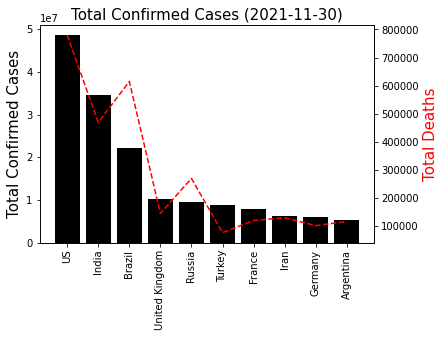

In [54]:
sns.barplot(top_ten_cases.index, top_ten_cases, color='black')
plt.xticks(rotation=90)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx()
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

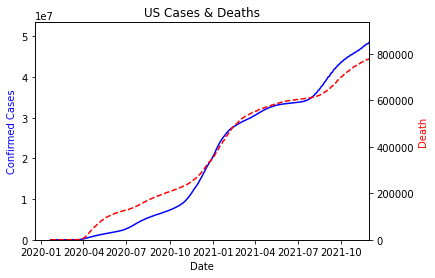

In [66]:
plt.plot(df_case.index, df_case['US'], 'b-')
plt.title('US Cases & Deaths')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases', color='blue')
plt.xlim(right=df_case.index[-1])
plt.ylim(0, df_case['US'].max() * 1.1)

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death['US'], 'r--')
ax2.set_ylabel('Death', color='red')
ax2.set_ylim(0, df_death['US'].max() * 1.2)
plt.show()

In [67]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기
def plot_case_with_death(country):
  plt.plot(df_case.index, df_case[country], 'b-')
  plt.ylabel('Confirmed Cases', color='blue')
  plt.title(country + ' Cases & Deaths')
  plt.xlabel('Date')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(0, df_case[country].max()*1.1)

  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3)
  plt.show()

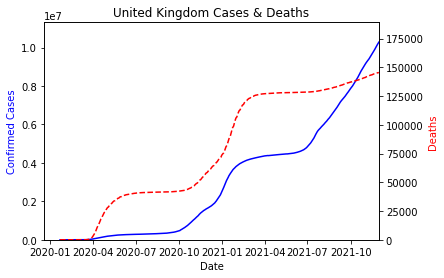

In [70]:
plot_case_with_death('United Kingdom')

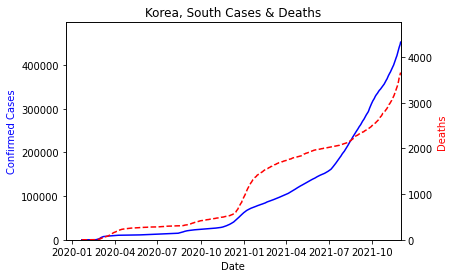

In [72]:
# 한국의 경우
plot_case_with_death('Korea, South')

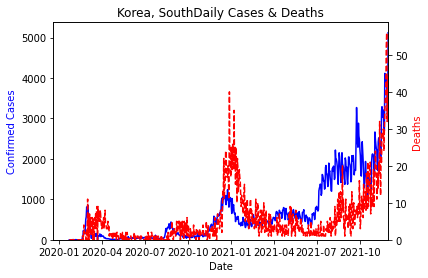

In [80]:
# 한국의 일일 확진자 수 / 사망자 수를 시각화
country = 'Korea, South'
plt.plot(df_case.index, df_case[country].diff(), 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(0)
plt.title(country + 'Daily Cases & Deaths')

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death[country].diff(), 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(0)
plt.show()

In [81]:
# Plotly를 이용하여 데이터 시각화하기
# 먼저 Plotly의 Choropleth 데이터 포맷으로 맞춘다
import plotly.graph_objects as go

In [82]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Hint) 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [83]:
df_code.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [87]:
country_to_code = df_code.set_index('COUNTRY')['CODE']

In [89]:
country_to_code

COUNTRY
Afghanistan       AFG
Albania           ALB
Algeria           DZA
American Samoa    ASM
Andorra           AND
                 ... 
Virgin Islands    VGB
West Bank         WBG
Yemen             YEM
Zambia            ZMB
Zimbabwe          ZWE
Name: CODE, Length: 222, dtype: object

In [91]:
df_c = df_case.rename(country_renamer, axis=1).copy()
for col in df_c.columns:
  if col not in country_to_code.index:
    df_c.drop(col, axis=1, inplace=True)
df_code = df_c.rename(country_to_code, axis=1)
df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,AZE,BHM,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,MMR,BDI,CPV,KHM,CMR,CAN,CAF,TCD,CHL,CHN,COL,COM,COG,...,SYC,SLE,SGP,SVK,SVN,SLB,SOM,ZAF,SSD,ESP,LKA,SDN,SUR,SWE,CHE,SYR,TWN,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,USA,UGA,UKR,ARE,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,18837,...,23197,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
2021-11-27,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,23197,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
2021-11-28,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,18837,...,23197,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48229210,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951


In [92]:
df_c

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Republic of the",...,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,United States,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,157171,198732,209817,16712,65130,4141,5324039,337005,206749,1121134,582504,22720,277536,1575424,24769,648472,1701633,30165,24850,2634,535115,272798,194909,22067630,14918,687410,15514,520706,20386,38353,120038,106794,1790579,11708,5107,1754443,111106,5060557,4482,18837,...,23197,6401,259875,1131206,413664,20,23016,2955328,12717,5131012,561059,42056,50710,1198848,986834,47764,16566,17493,26261,2100959,19821,26236,1,69008,716988,8702611,48176523,127413,3565644,741790,10125945,398890,192381,6,429360,1181337,459479,9979,210118,133836
2021-11-27,157190,199137,209980,16712,65139,4141,5325560,337522,207984,1132805,584121,22734,277552,1575579,24769,650168,1701633,30165,24850,2636,535115,272798,194909,22076863,14992,688628,15711,521211,20386,38358,120064,106794,1792561,11708,5107,1757077,111132,5063177,4489,18837,...,23197,6401,261636,1143068,415898,20,23016,2958548,12717,5131012,561778,42056,50741,1198848,986834,47764,16578,17493,26261,2100959,19822,26241,1,69680,717163,8726370,48201079,127423,3580671,741858,10165779,399181,192599,6,430046,1197404,459479,9981,210138,133836
2021-11-28,157218,199555,210152,16712,65144,4141,5326448,337931,209139,1143283,585783,22734,277585,1575784,24923,651839,1701633,30165,24850,2640,536472,272798,194909,22080906,14992,689356,15711,521561,20386,38362,120087,106794,1794286,11708,5107,1759405,111176,5065373,4498,18837,...,23197,6401,262383,1152125,417376,20,23016,2961406,12717,5131012,562520,42056,50760,1198848,986834,47965,16588,17493,26261,2106813,19822,26241,1,70136,717258,8748025,48229210,127451,3588916,741918,10202370,399348,192831,6,430696,1210340,459479,9987,210143,133951


In [94]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성
  data = go.Choropleth(
      locations = df_code.columns,
      z = df_code.loc[date],
      text = df_c.columns,
      colorscale = 'Blues',
      autocolorscale=False,
      reversescale=True,
      marker_line_color='darkgray',
      marker_line_width=0.5,
      colorbar_tickprefix = '',
      colorbar_title = 'Confirmed Cases',
  )
  return data

In [96]:
date = df_case.index[-1]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in ' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

In [99]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.
df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
674,2021-11-26,436968
675,2021-11-27,440896
676,2021-11-28,444200
677,2021-11-29,447230


In [100]:
# 학습데이터와 테스트데이터 분리하기
from math import floor

In [101]:
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test size <1) 비율에 따라 테스트/학습 데이터프레임으로 나눔
  div = floor(df.shape[0] * (1-test_size))
  return df.loc[:div], df.loc[div+1:]


In [102]:
train_df, test_df = train_test_split_df(df, 0.2)

In [104]:
train_df.tail()

,ds,y
539,2021-07-14,173511
540,2021-07-15,175046
541,2021-07-16,176500
542,2021-07-17,177951
543,2021-07-18,179203


In [106]:
test_df.head()

,ds,y
544,2021-07-19,180481
545,2021-07-20,182265
546,2021-07-21,184103
547,2021-07-22,185733
548,2021-07-23,187362


In [107]:
#Prophet 모델 학습하기
#  모델 생성 및 학습 데이터 학습
from fbprophet import Prophet

In [108]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


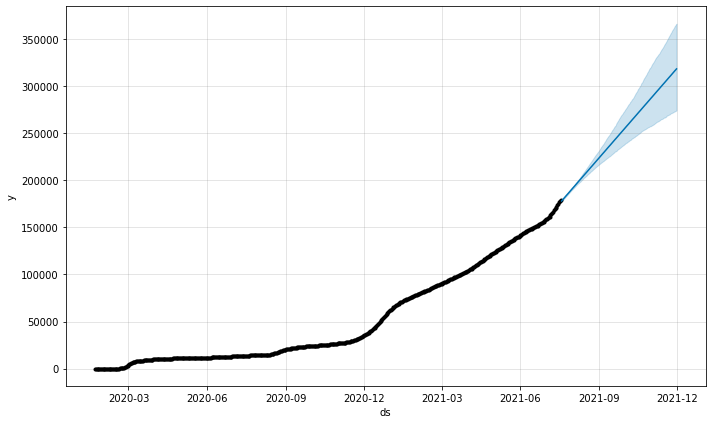

In [109]:
# Prophet 모델 학습 결과 시각화하기
from fbprophet.plot import add_changepoints_to_plot

# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용
pred = model.predict(test_df)
model.plot(pred);

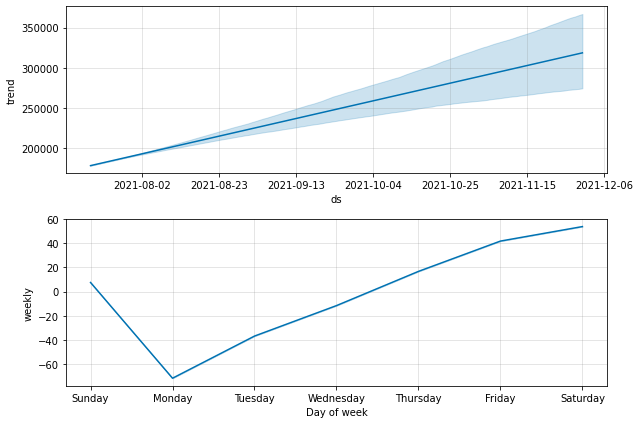

In [110]:
model.plot_components(pred);

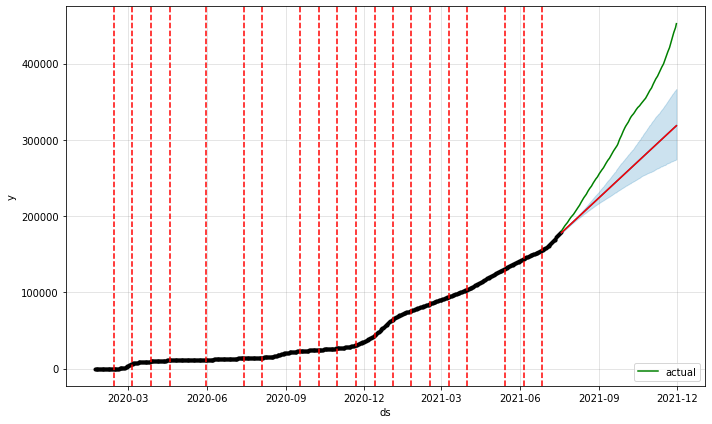

In [111]:
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
changes = add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()